<h4 align="center">
LIMPIEZA Y MODIFICACION DE DATOS
</h4>

In [180]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

#Leemos el dataset original
df = pd.read_csv('data/matriculaciones_educacion_escolar_basica_2020.csv')

#Eliminamos una columna que no posee datos
df = df.drop(columns='anho_cod_geo')


#Renombrar nombre de las columnas
df = df.rename(columns={
    'anio':'año', 'nombre_departamento':'departamento', 'nombre_distrito': 'distrito', 
    'nombre_zona': 'zona', 'nombre_barrio_localidad': 'localidad', 'nombre_institucion': 'institucion', 
    'sector_o_tipo_gestion': 'sector'
})


#Indexacion y ordenamiento
df = df.set_index('departamento')
df = df.sort_values(['departamento', 'distrito', 'localidad'])


#Limpieza de la columna 'nombre_barrio_localidad' ('localidad') y 'codigo_barrio_localidad'
df.loc[
    (df['localidad'] == 'LOCALIDAD DE CONFIRMAR') 
    | (df['localidad'] == 'LOCALIDAD A CONFIRMAR') 
    | (df['localidad'] == 'LOCALIDAD A  CONFIRMAR'), 'localidad'
] = 'LOCALIDAD A CONFIRMAR'

df.loc[df['localidad'] == 'LOCALIDAD A CONFIRMAR', 'codigo_barrio_localidad'] = '0'

#Agregamos una nueva columna
df['total_matriculados'] = df['total_matriculados_hombre'] + df['total_matriculados_mujer']

<h5>OBJETIVO 1:</h6>
Visualizar gráficamente la distribución de matriculados en la educación escolar básica por departamento.

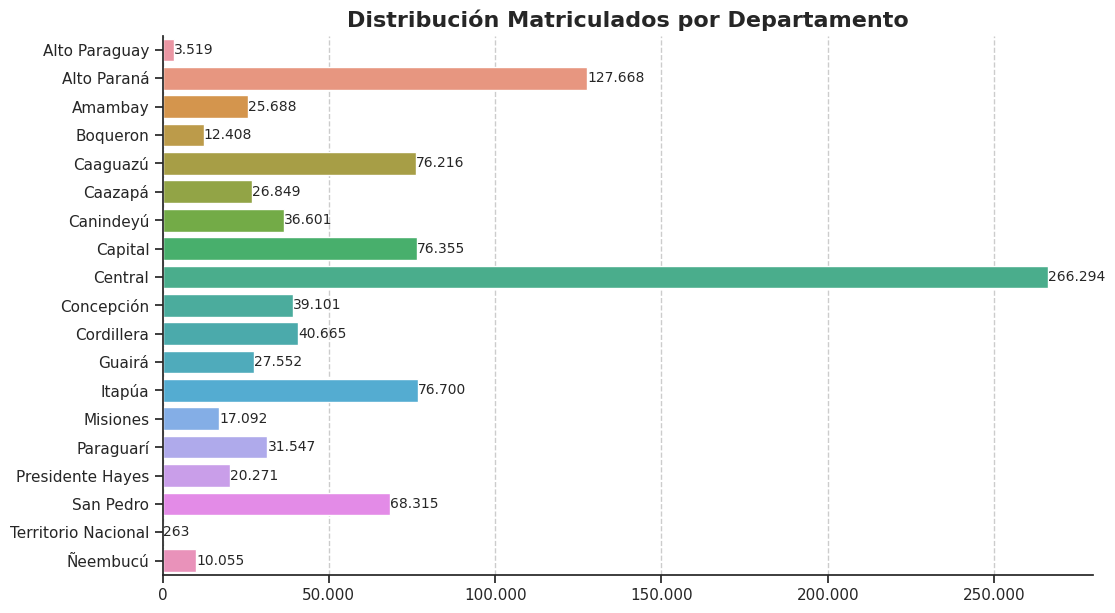

In [184]:
general_format = {'figure.figsize':(12, 7), 'grid.linestyle': '--', 'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', rc = general_format)

#Agrupamos por departamento y obtenemos el total de matriculados
df_departamento = df.groupby(['departamento']).agg({'total_matriculados':'sum'})

#Exportamos a csv
df_departamento.to_csv('data/resumen_departamento_total.csv', encoding = 'utf-8-sig')

df_departamento = df_departamento.reset_index()

# Establecemos la sesión como no-interactiva.
plt.ioff()

# Diagramamos el gráfico de barras.
ax = sns.barplot(y = 'departamento', x = 'total_matriculados', data = df_departamento, errorbar = None)
ax.bar_label(ax.containers[0], fontsize = 10, labels = [f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues])

# Formatemos los labels del eje x
xlabels = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(xlabels))
ax.set_xticklabels([f'{x:,.0f}'.replace(',', '.') for x in xlabels]) 

# Cambios visuales
ax.set(xlabel = None, ylabel = None)
ax.axes.set_title('Distribución Matriculados por Departamento', fontsize = 16, weight = 'bold')
ax.grid(visible = True)
ax.yaxis.grid(False)

# Mostramos el gráfico.
plt.show()

<h5>OBJETIVO 2: (EDE)</h6>
Representar la distribución de matriculados en la educación escolar básica por distrito.

<h5>OBJETIVO 3: (RICH)</h6>
Plasmar gráficamente la distribución de matriculados en la educación escolar básica por localidad.

<h5>OBJETIVO 4: (RICH)</h6>
Reflejar mediante un gráfico la distribución de matriculados en la educación escolar básica por género.

<h5>OBJETIVO 5: (RICH)</h6>
Representar la distribución de matriculados en la educación escolar básica por grado.

<h5>OBJETIVO 6: (EDE)</h6>
Plasmar gráficamente la distribución de matriculados en la educación escolar básica por ciclo (primer ciclo, segundo ciclo, tercer ciclo).

<h5>OBJETIVO 7: (RICH)</h6>
Obtener un top de instituciones con mayor cantidad de matriculados a nivel país.

<h5>OBJETIVO 8: (EDE)</h6>
Elaborar un top de instituciones con mayor cantidad de matriculados por departamento.

<h5>OBJETIVO 9: (EDE)</h6>
Producir un top de instituciones con mayor cantidad de matriculados por zona.